# Sentence Encoding
from https://github.com/UKPLab/sentence-transformers#getting-started
list of pretrained models: https://docs.google.com/spreadsheets/d/14QplCdTCDwEmTqrn1LH4yrbKvdogK4oQvYO1K1aPR5M/edit#gid=0


Here we use the power of pre-trained models to embedd models 

In [103]:
from sentence_transformers import SentenceTransformer, util
import torch
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# nli - trained on NLI (natural language interface) dataset
# stsb - trained on 

In [72]:
def knn_sentence_embedding(query, corpus, k = 5):
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    corpus_embedding = embedder.encode(corpus, convert_to_tensor=True) 

    cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
    cos_scores = cos_scores.cpu()

    #We use torch.topk to find the highest 5 scores
    top_results = torch.topk(cos_scores, k=k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(answers[idx], "(Score: %.4f)" % (score))

In [2]:


# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = 5
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
    cos_scores = cos_scores.cpu()

    #We use torch.topk to find the highest 5 scores
    top_results = torch.topk(cos_scores, k=top_k)

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for score, idx in zip(top_results[0], top_results[1]):
        print(corpus[idx], "(Score: %.4f)" % (score))





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.5777)
A man is eating a piece of bread. (Score: 0.4986)
A man is riding a horse. (Score: 0.1581)
A man is riding a white horse on an enclosed ground. (Score: 0.1474)
Two men pushed carts through the woods. (Score: 0.0992)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6435)
A man is eating a piece of bread. (Score: 0.1719)
A man is eating food. (Score: 0.1240)
A man is riding a white horse on an enclosed ground. (Score: 0.0706)
A cheetah is running behind its prey. (Score: 0.0352)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.7769)
A man is riding a white horse on an enclosed ground. (Score: 0.2485)
A man is riding a horse. (Score: 0.2116)
A monkey is playing drums. (Score: 0.1820)
Two men p

In [78]:
questions = ["How tall is the Eiffel Tower?",
             "What is the Height of the Eiffel Tower?",
            "What color is the Liberty Statue?",
            "Where is the Red Square?",
            "Where is the Mona-Lisa"]

answers = ["The libery Statue is green",
          "The Eiffel Tower is brown",
          "The Eiffel tower is in Paris",
          "The Eiffel tower is 300m tall",
          "The Red Square is in Russia",
          "The Red square is in Moskva",
          "The liberty Statue is 80 m tall",
          "The Libery statue is in New York",
          "France gifted USA the Liberty statue, a smaler version is in Paris",
          "The Eiffel tower is taller than the Statue of Liberty",
          "At 300 m the Eiffel tower is the talles building in Paris"]


corpus_embeddings = embedder.encode(answers, convert_to_tensor=True)


# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = 5
for query in questions:   
    knn_sentence_embedding(query, answers, k = 5)
 






Query: How tall is the Eiffel Tower?

Top 5 most similar sentences in corpus:
The Eiffel tower is in Paris (Score: 0.8388)
The Eiffel tower is taller than the Statue of Liberty (Score: 0.8327)
The Eiffel tower is 300m tall (Score: 0.8174)
The Eiffel Tower is brown (Score: 0.7872)
At 300 m the Eiffel tower is the talles building in Paris (Score: 0.7346)




Query: What is the Height of the Eiffel Tower?

Top 5 most similar sentences in corpus:
The Eiffel tower is in Paris (Score: 0.8158)
The Eiffel tower is 300m tall (Score: 0.8141)
The Eiffel tower is taller than the Statue of Liberty (Score: 0.8018)
The Eiffel Tower is brown (Score: 0.7660)
At 300 m the Eiffel tower is the talles building in Paris (Score: 0.7262)




Query: What color is the Liberty Statue?

Top 5 most similar sentences in corpus:
France gifted USA the Liberty statue, a smaler version is in Paris (Score: 0.4527)
The liberty Statue is 80 m tall (Score: 0.3841)
The libery Statue is green (Score: 0.3619)
The Libery s

In [4]:
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

# Single list of sentences
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

#Compute embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(embeddings, embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))

The new movie is awesome 		 The new movie is so great 		 Score: 0.9816
The cat sits outside 		 The cat plays in the garden 		 Score: 0.6247
I love pasta 		 The new movie is so great 		 Score: 0.2605
I love pasta 		 The new movie is awesome 		 Score: 0.2526
I love pasta 		 The cat plays in the garden 		 Score: 0.2455
I love pasta 		 Do you like pizza? 		 Score: 0.1997
The cat sits outside 		 A woman watches TV 		 Score: 0.1837
The cat plays in the garden 		 A woman watches TV 		 Score: 0.1760
A man is playing guitar 		 Do you like pizza? 		 Score: 0.1080
A woman watches TV 		 The new movie is so great 		 Score: 0.1008


## MSMARCO dataset
Here we are going to look a bit at a small subset of a ms-marco dataset

In [58]:
from pandas import read_csv

docs = read_csv("https://thigm85.github.io/data/msmarco/docs.tsv", sep = "\t", index_col="id")
docs.shape

(996, 2)

In [59]:
docs.head()

,title,body
id,,
D2185715,What Is an Appropriate Gift for a Bris,Hub Pages Religion and Philosophy Judaism...
D2819479,lunge,1lungenoun ˈlənj Popularity Bottom 40 of...
D1020246,GERD,GERDAlso found in Dictionary Acronyms Rela...
D3180369,Real Life Fitness Questions Answered,How many calories can I burn in a 45minute ton...
D1413048,Other Works,Edit Elvis Presley Other Works Showing all 88...


In [60]:
import requests, json

labelled_data = json.loads(
    requests.get("https://thigm85.github.io/data/msmarco/query-labels.json").text
)

print("Number of queries:", len(labelled_data))


Number of queries: 100


In [61]:
labelled_data[0:4]

[{'query_id': '1',
  'query': 'what county is aspen co',
  'relevant_docs': [{'id': 'D1098819'}]},
 {'query_id': '2',
  'query': 'where is aeropostale located',
  'relevant_docs': [{'id': 'D2268823'}]},
 {'query_id': '3',
  'query': 'why am i hungry all the time',
  'relevant_docs': [{'id': 'D2383262'}]},
 {'query_id': '4',
  'query': 'what organs are located in the right lumbar region',
  'relevant_docs': [{'id': 'D1744573'}]}]

In [84]:
query_index = 50 #form 0 - 99

query = labelled_data[query_index]["query"]
relevant_doc = labelled_data[query_index]["relevant_docs"]
relevant_doc_id = relevant_doc[0]["id"]

doc_title = docs.loc[relevant_doc_id, "title"]
doc_body = docs.loc[relevant_doc_id, "body"]

n_queries = len(labelled_data[query_index]["query"])
queries = [0 for _ in range(n_n_queries)]
doc_bodies = [0 for _ in range(n_n_queries)]
doc_titles = [0 for _ in range(n_n_queries)]

for i, q in enumerate(labelled_data):
    



for i, q in enumerate(labelled_data):
    query = q["query"]
    relevant_doc = q["relevant_docs"]
    relevant_doc_id = relevant_doc[0]["id"]

    doc_title = docs.loc[relevant_doc_id, "title"]
    doc_body = docs.loc[relevant_doc_id, "body"]
    print(query,end="\n")
    
    query_embedding = model.encode(query, convert_to_tensor=True)
    title_embedding = model.encode(doc_title, convert_to_tensor=True)
    body_embedding = model.encode(doc_body, convert_to_tensor=True)
    
    cos_score_title = util.pytorch_cos_sim(query_embedding, title_embedding)[0]
    cos_score_body = util.pytorch_cos_sim(query_embedding, body_embedding)[0]
    cos_score_title = cos_score_title.cpu()
    
    print(cos_score_title,end="\t")
    print(cos_score_body)


    
    
    


0
what county is aspen co
tensor([0.8276])	tensor([0.5565], device='cuda:0')
1
where is aeropostale located
tensor([0.1046])	tensor([0.2163], device='cuda:0')
2
why am i hungry all the time
tensor([0.7794])	tensor([0.6145], device='cuda:0')
3
what organs are located in the right lumbar region
tensor([0.9561])	tensor([0.5284], device='cuda:0')
4
who was president when slavery ended 
tensor([-0.0571])	tensor([0.3231], device='cuda:0')
5
medical definition of disease process
tensor([0.6896])	tensor([0.4098], device='cuda:0')
6
bcbs of georgia customer service
tensor([0.5686])	tensor([0.4910], device='cuda:0')
7
what the meaning of fanciful
tensor([0.6872])	tensor([0.5917], device='cuda:0')
8
what is a glomus tumor
tensor([0.6943])	tensor([0.4104], device='cuda:0')
9
is steel a solution
tensor([0.6561])	tensor([0.4600], device='cuda:0')
10
what does geometry mean
tensor([1.0000])	tensor([0.4014], device='cuda:0')
11
how to get dell inspiron 1300 back to factory settings
tensor([-0.0717])	t

tensor([0.5576])	tensor([0.3350], device='cuda:0')
96
what is direct supervision
tensor([1.0000])	tensor([0.3901], device='cuda:0')
97
symptoms of diverticular disease
tensor([0.6062])	tensor([0.3692], device='cuda:0')
98
what are turtle beans
tensor([1.0000])	tensor([0.5676], device='cuda:0')
99
is sodium bicarbonate organic or inorganic
tensor([0.9234])	tensor([0.5434], device='cuda:0')


In [94]:
n_queries = len(labelled_data)
queries = [0 for _ in range(n_queries)]
doc_bodies = [0 for _ in range(n_queries)]
doc_titles = [0 for _ in range(n_queries)]

for i, q in enumerate(labelled_data):
    queries[i] = q["query"]
    relevant_doc = q["relevant_docs"]
    relevant_doc_id = relevant_doc[0]["id"]

    doc_titles[i] = docs.loc[relevant_doc_id, "title"]
    doc_bodies[i] = docs.loc[relevant_doc_id, "body"] 


query_embeddings = model.encode(queries, convert_to_tensor=True).cpu()
body_embeddings = model.encode(doc_bodies, convert_to_tensor=True).cpu()
title_embeddings = model.encode(doc_titles, convert_to_tensor=True).cpu()

df = pd.DataFrame({
    "query" : queries,
    "body" : doc_bodies,
    "title" : doc_titles,
    "query_embedding" : query_embeddings,
    "body_embedding" : body_embeddings,
    "title_embeddings" : title_embeddings
})


In [101]:
print(len(df))
df.head()

100


,query,body,title,query_embedding,body_embedding,title_embeddings
0,what county is aspen co,Aspen Colorado From Wikipedia the free ency...,Aspen Colorado,"(tensor(-0.2218), tensor(0.4671), tensor(0.921...","(tensor(0.1629), tensor(0.7812), tensor(0.6642...","(tensor(0.0353), tensor(0.4905), tensor(0.6664..."
1,where is aeropostale located,On May 4 2016 Aéropostale Inc filed volunt...,Apparel Search,"(tensor(-0.0683), tensor(0.5936), tensor(-0.65...","(tensor(0.3318), tensor(0.6873), tensor(0.0010...","(tensor(-0.0637), tensor(0.0428), tensor(0.326..."
2,why am i hungry all the time,Why Am I Hungry All the Time 4 Potential Caus...,Why Am I Hungry All the Time 4 Potential Causes,"(tensor(0.2738), tensor(0.5077), tensor(0.4868...","(tensor(0.6349), tensor(0.3028), tensor(0.9650...","(tensor(0.4687), tensor(0.3680), tensor(1.2662..."
3,what organs are located in the right lumbar re...,Ilikevultures 17 Contributions What are the or...,What are the organs in the right lumbar region,"(tensor(-0.7174), tensor(-0.2629), tensor(0.46...","(tensor(-0.0061), tensor(0.4266), tensor(0.779...","(tensor(-0.5167), tensor(-0.4555), tensor(0.41..."
4,who was president when slavery ended,On November 6 1860 Abraham Lincoln was elect...,PBSIs WTTW your local station Yes WTTW No Cha...,"(tensor(-0.5175), tensor(-0.7174), tensor(-0.1...","(tensor(0.8618), tensor(-0.1995), tensor(0.041...","(tensor(0.7089), tensor(0.1275), tensor(0.2284..."


In [108]:

query_title_cos = util.pytorch_cos_sim(df["query_embedding"], df["title_embeddings"])
query_body_cos = util.pytorch_cos_sim(df["query_embedding"], df["body_embedding"])


## Query Vs Title cosine-similarity
Here we look at the cosine similarity between the query and the title. This is orginized in such a way that the quey and the corresponding document title fall on the diagonal. It is cler that the diagonal is brighter. So, there is som similarity between the title and the query.

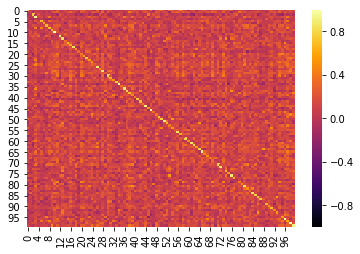

In [121]:
sns.heatmap(query_title_cos, vmin = -1, vmax = 1, cmap="inferno")

## Query Vs Body cosine-similarity
Here we look at the cosine similarity between the query and the body. This is orginized in such a way that the quey and the corresponding document body fall on the diagonal. It is cler that the diagonal is brighter. So, there is som similarity between the title and the query. However, compared with Q vs Title the plot seems darker (lower similarity)

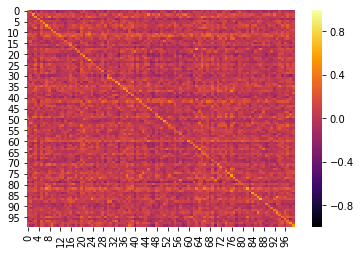

In [122]:
sns.heatmap(query_body_cos, vmin = -1, vmax = 1, cmap="inferno")